### Домашняя работа

**Задача высокого уровня** В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_0)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_k)& k\neq 0 \\
\end{array}
\right.
$$

Загружаем датасет из приложенного csv

In [29]:
import numpy as np
import pandas as pd

data = pd.read_csv('non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


Отображаем точки на графике

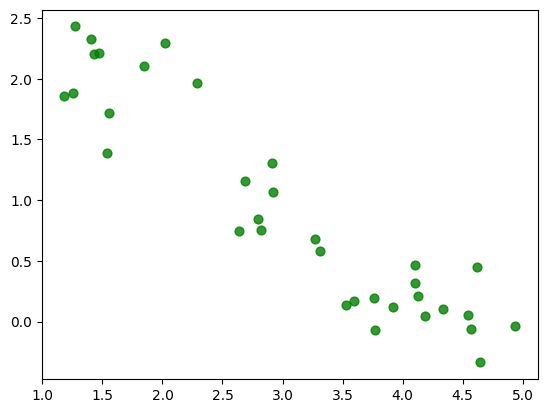

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

# основной график
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.show()

Реализуем метод градиентного спуска:

Вычисляем градиент

In [31]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gradient(X, y, w, lambda_ = 0) -> np.array:
    # количество обучающих примеров в выборке
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    error = y - y_hat
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    grad = (np.multiply(X, error) + 2*w*lambda_).sum(axis=0)*(-1.0)*2.0 / n
    return grad, error

Делаем шаг градиентного спуска

In [32]:
def eval_w_next(X, y, eta, w_current, lambda_ = 0):
    # вычисляем градиент
    grad, error = gradient(X, y, w_current, lambda_)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    weight_evolution = distance.euclidean(w_current[0], w_next[0])
    return (w_next, weight_evolution, grad)

Повторяем шаги (1,2) до сходимости

In [33]:
def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.001, lambda_ = 0) -> np.array:
    m = X.shape[1] # количество фичей
    # инициализируем рандомом веса
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w, lambda_ = lambda_)
    step = 0
    # повторяем до сходимости вектора весов
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w, lambda_ = lambda_)
        step += 1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w

Запускаем обучение

In [34]:
# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц. См. прошлый урок, почему так
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])
w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), eta=0.008)

step 100 |w-w_next|=0.00473, grad=[-0.56809268  0.16411068]
step 200 |w-w_next|=0.00389, grad=[-0.46749813  0.13505091]
step 300 |w-w_next|=0.00320, grad=[-0.38471627  0.11113688]
step 400 |w-w_next|=0.00264, grad=[-0.31659295  0.09145741]
step 500 |w-w_next|=0.00217, grad=[-0.26053251  0.07526266]
step 600 |w-w_next|=0.00179, grad=[-0.21439892  0.06193558]
step 700 |w-w_next|=0.00147, grad=[-0.17643441  0.05096839]
step 800 |w-w_next|=0.00121, grad=[-0.14519243  0.0419432 ]


В этом модуле мы узнали, как  обучать линейную регрессию, не "упираясь" в аппаратные ресурсы: использовать градиентный спуск.
Мы узнали, как детектировать переобучение модели и закрепили свои знания на примере полиномиальной регрессии и выяснили, как увеличить качество решения с помощью механизма регуляризации. Познакомились с двумя видами регуляризации -  Ridge и Lasso.